<a href="https://colab.research.google.com/github/ChachoWacho/AccountTest/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSBA CERT/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 4 ***int64** columns, 1 **float64** column and 4 **string** columns


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* there are no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* the **minimum** time is 20.00 mins
* the **average** time is 27.37 mins
* the **maximum** time is 35.00 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* 736 orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

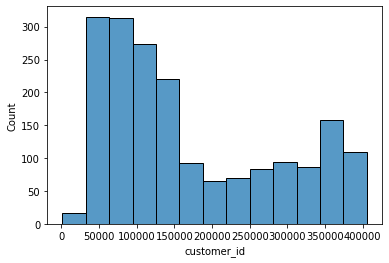

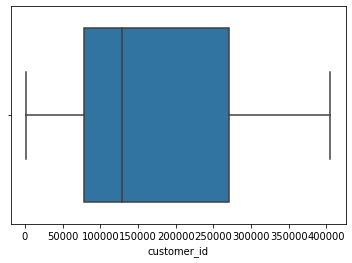

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
sns.histplot(data=df, x = 'customer_id')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')
sns.boxplot(data=df,x='customer_id')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')



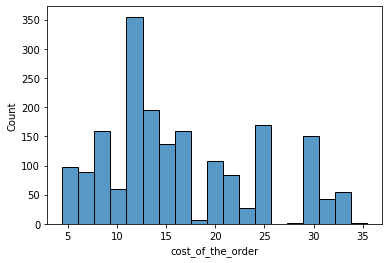

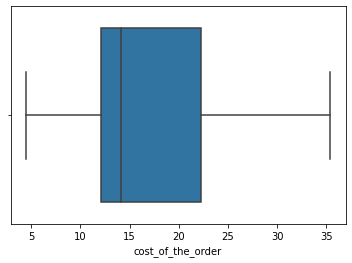

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
sns.histplot(data=df, x = 'cost_of_the_order')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

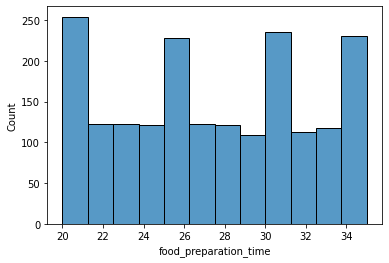

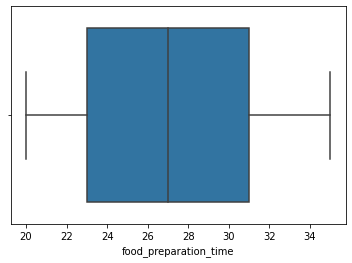

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
sns.histplot(data=df, x = 'food_preparation_time')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')
sns.boxplot(data=df,x='food_preparation_time')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

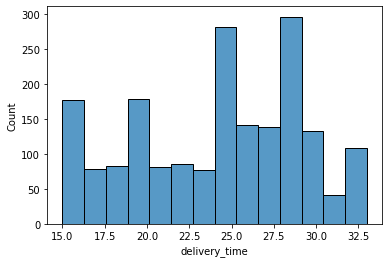

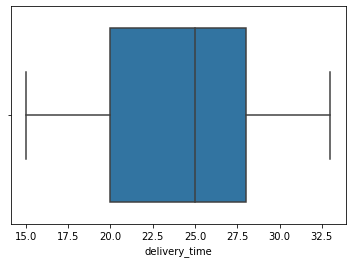

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
sns.histplot(data=df, x = 'delivery_time')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')
sns.boxplot(data=df,x='delivery_time')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


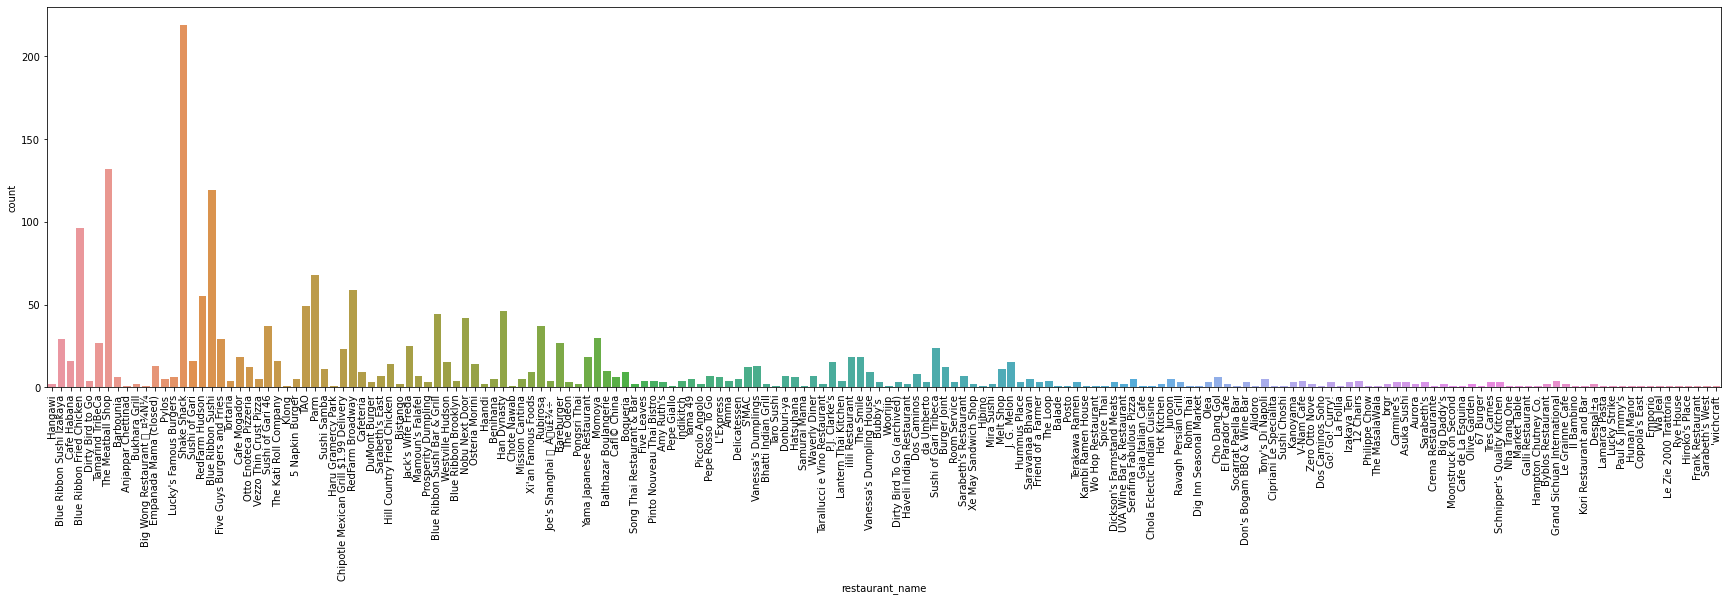

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
plt.figure(figsize=(30, 7))
sns.countplot(data=df, x = 'restaurant_name')
plt.xticks(rotation=90)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations:
* The top 5 restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

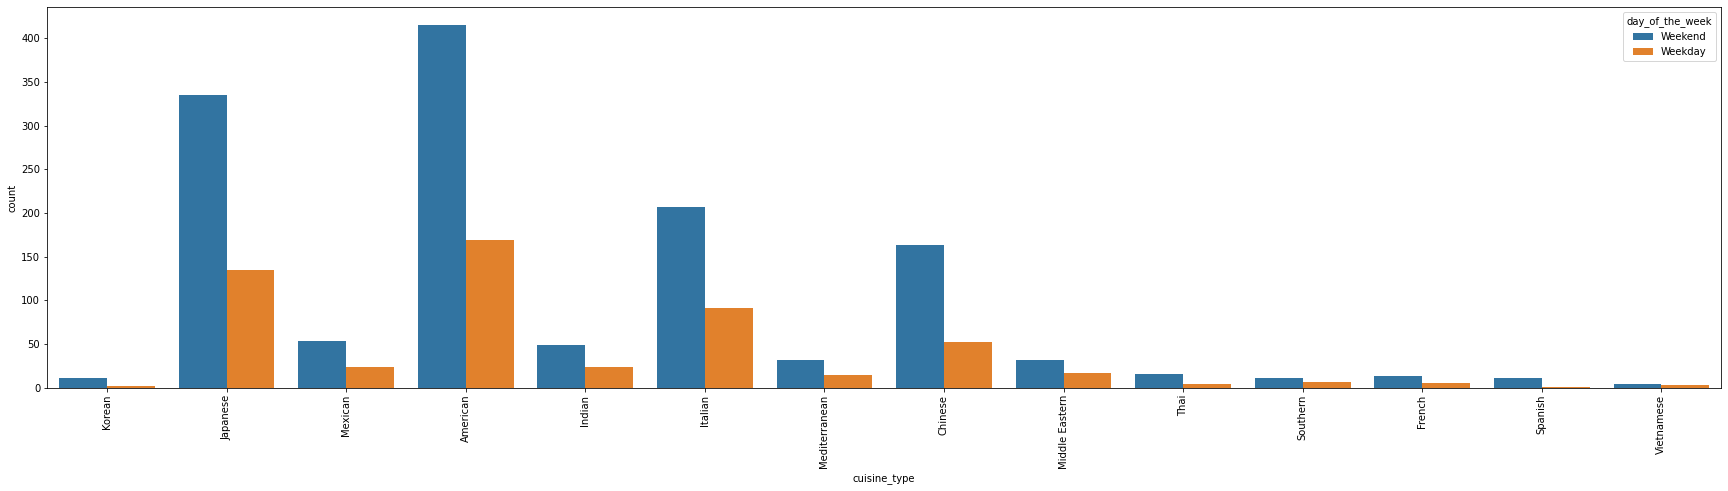

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
plt.figure(figsize=(30, 7))
sns.countplot(data=df, x = 'cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')


#### Observations:
American Cuisine is the most popular cuisine on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df_greater_than_20 = df[df['cost_of_the_order'] > 20] #number of orders greater than $20

percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100 #percentage or of orders greater than 20 in the dataset

print(round(percentage, 2), "%")

29.24 %


#### Observations:
The percentage of orders that cost more than $20 is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_del_time = df['delivery_time'].mean()

print(round(mean_del_time, 2))

24.16


#### Observations:
* the mean delivery time in the dataset is 24.16 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* The top most frequent customer_id is 52832 with 13 orders placed.
* The second most frequent customer_id is 47440 with 10 orders placed.
* The third most frequent customer_id is 83287 with 9 orders placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


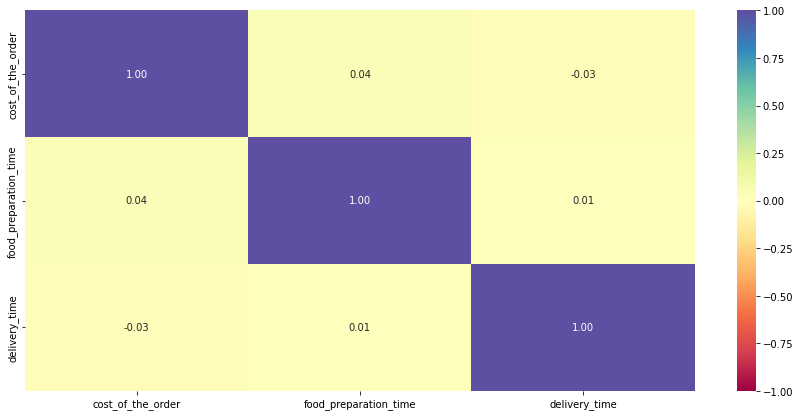

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

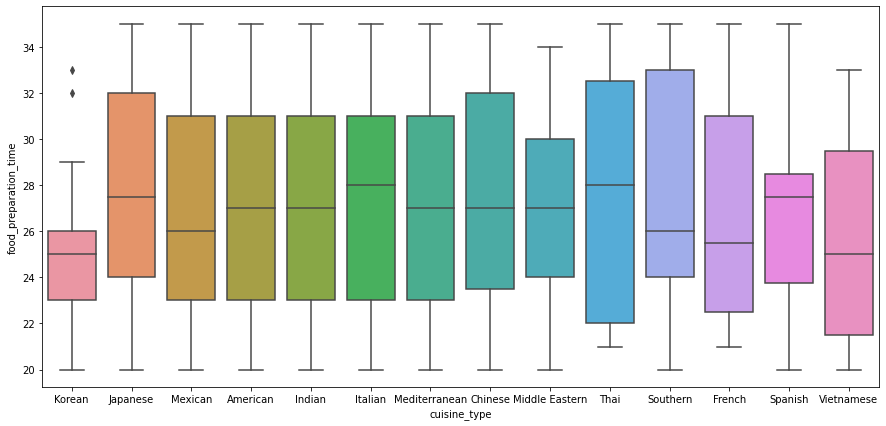

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time')  
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

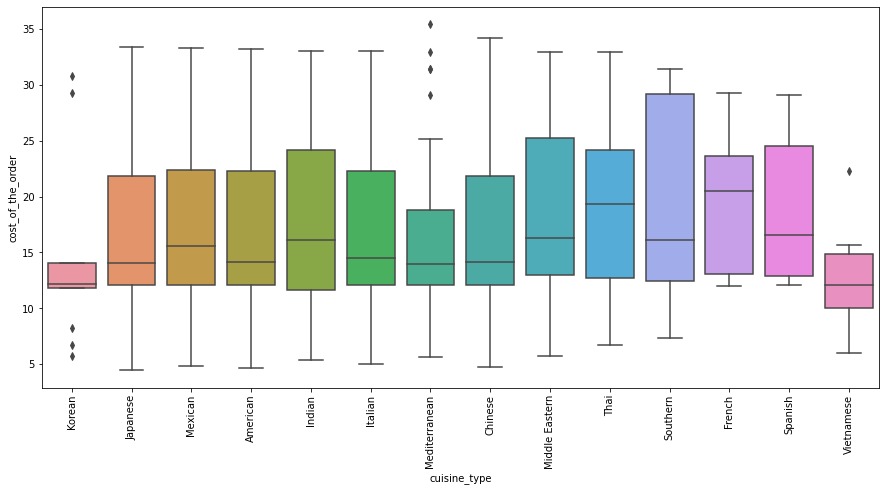

<Figure size 432x288 with 0 Axes>

In [ ]:
# Write the code here
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 90)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

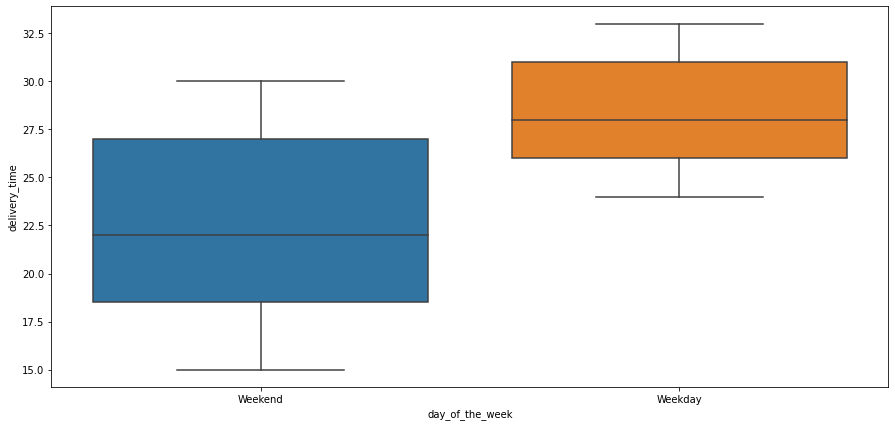

<Figure size 432x288 with 0 Axes>

In [ ]:
#Write the code here
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x = 'day_of_the_week', y = 'delivery_time')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

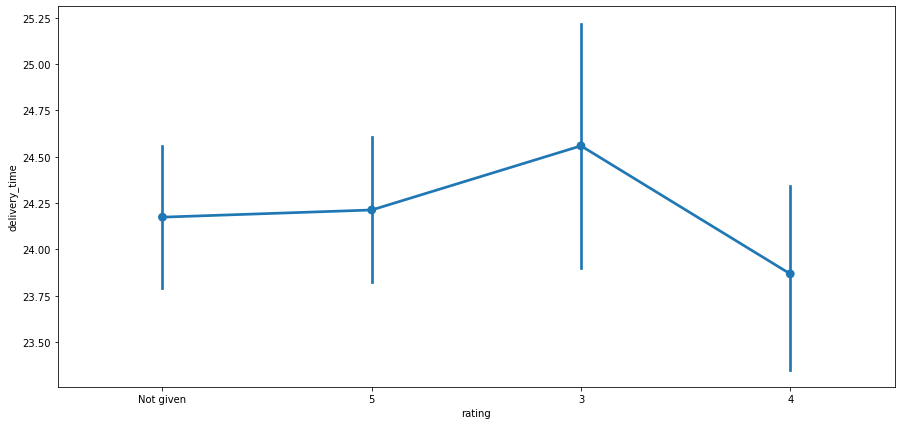

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x = 'rating', y = 'delivery_time')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

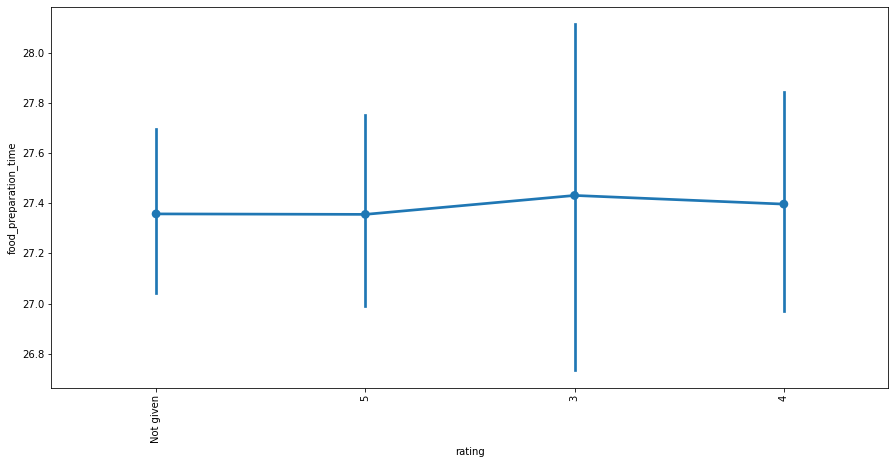

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x = 'rating', y = 'food_preparation_time')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

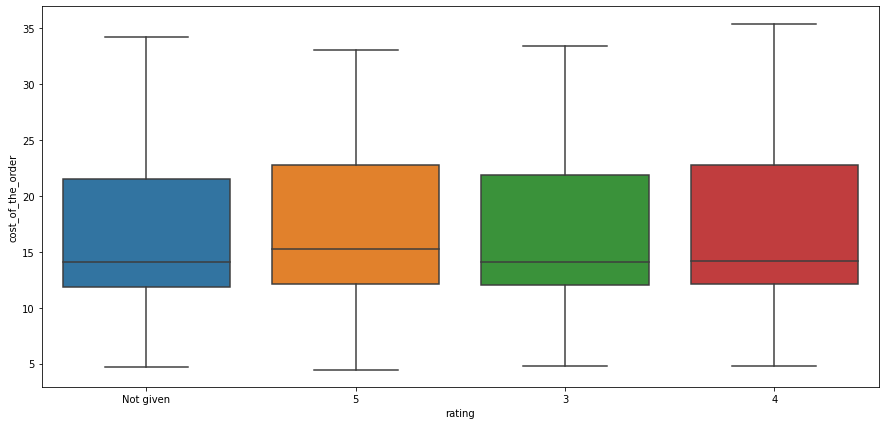

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x = 'rating', y = 'cost_of_the_order')
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
* Four restaurants meet the criteria and they are: 
* The Meatball Shop
* Blue Ribbon Fried Chicken
* Shake Shack
* Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#determin revenue
def get_revenue(x):
  if x > 20:
    return x * 0.25
  elif x > 5:
    return x * 0.15
  else:
    return x * 0

#computing the revenue
df['Revenue'] = df['cost_of_the_order'].apply(get_revenue)
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
#total revenue
total_revenue = df['Revenue'].sum()
print("The total revenue is around", round(total_revenue, 2), "dollars.")

The total revenue is around 6166.3 dollars.


#### Observations:
* The total revenue across all orders in about $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#get total delivery time and add a new column to the dataframe to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

df_greater_than_60 = df[df['total_time'] > 60] #total time greater than 60 mins

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100 #percentage total time greater than 60 mins

print(round(percentage, 2), "%")

10.54 %


#### Observations:
* 10.54% of orders take more than 60 mins to prepare and deliver

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
#mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

#mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
* The delivery time varies about 6 mins on average betweent he weekdays and weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American cuisine is really popular on the weekends.
*  The time to get your food isn't that much differen between weekdays and weekends.
*  Only about 10 percent of orders are prepared and delivered more than 60 mins after placing order.
*  The longer the delivery time the lower the rating.

### Recommendations:

*  Try to get the percentage of total time (food prep and delivery) over 60 mins down under 10%
*  If delivery times are improved then ratins also will improve

---